### PTID-CDS-JUN22-1329

## Business case for  PRCL-0019


### Project Name :Ficzon-sales-effectiveness

### Business Case:
FicZon Inc is an IT solution provider with products ranging from on premises products to SAAS based solutions.
FicZon major leads generation channel is digital and through their website. 
FicZon business is majorly dependent on the sales force 
effectiveness. As the market is maturing and more new competitors 
entering the market, FicZon is experiencing the dip in sales. 
Effective sales is dependent on lead quality and as of now, this is 
based on manual categorization and highly depended on sales staff. 
Though there is a quality process, which continuously updates the 
lead categorization, it’s value is in for post analysis, rather than 
conversation.
FicZon wants to explore Machine Learning to pre-categorize the lead 
quality and as result, expecting significant increase in sales 
effectiveness

### PROJECT GOAL:
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)

In [161]:
!pip install pymysql
!pip install mysql-connector

In [162]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data from SQL database

In [163]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [164]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [165]:
query="select* from data"
data=pd.read_sql(query,connection)

In [259]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score , classification_report,precision_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

### Basic Checks

In [166]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [167]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [168]:
data.shape

(7422, 9)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [170]:
# insights: Dtype of all the columns is object.

In [171]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [ ]:
# insights: There are few empty values in the dataset.junk lead is occuring maximum times in the dataset.

In [172]:
data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [173]:
data.Delivery_Mode.value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [174]:
data.Product_ID.value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [175]:
data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [176]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [177]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

<AxesSubplot:ylabel='Source'>

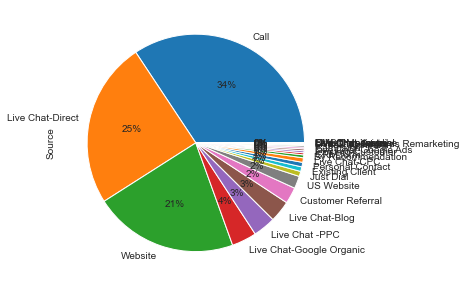

In [285]:
data['Source'].value_counts().plot.pie(figsize = (10,5), autopct = '%1.0f%%')

In [228]:
# insights: 80% source data is from call,live chart direct and website

<AxesSubplot:ylabel='Location'>

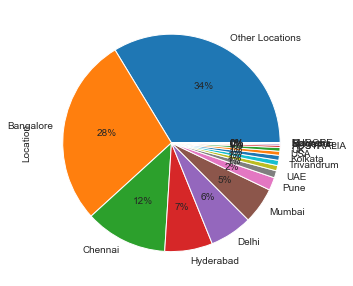

In [271]:
data['Location'].value_counts().plot.pie(figsize = (10,5), autopct = '%1.0f%%')

In [ ]:
# Insights: 28% dataset is from Bangalore.

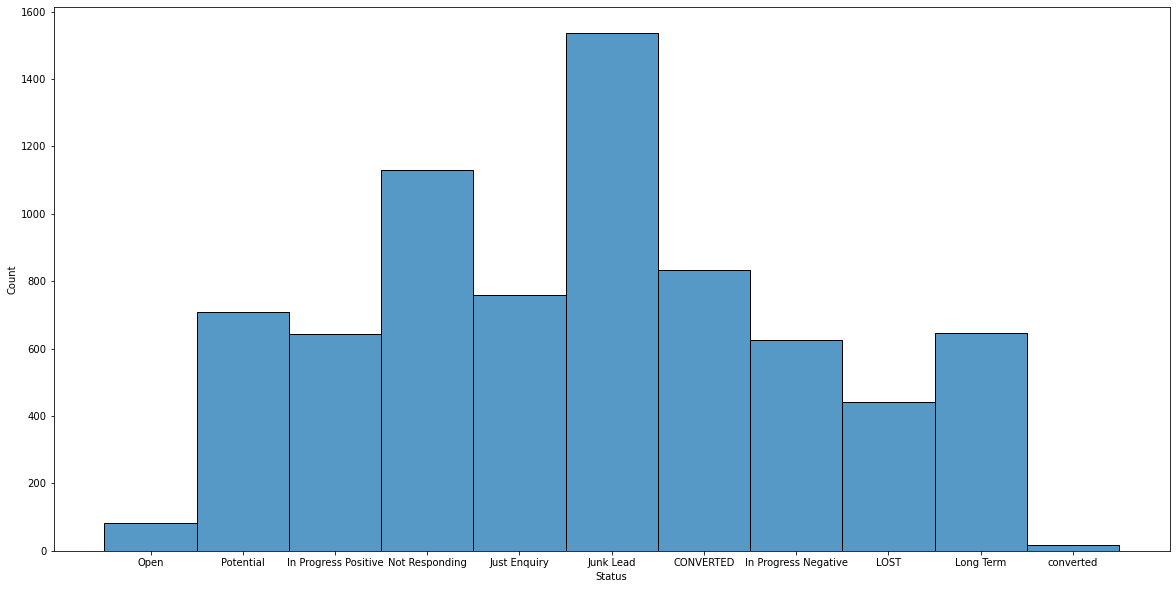

In [231]:
plt.figure(figsize=(20,10))
sns.histplot(x='Status',data=data)
plt.show()


In [ ]:
#Insights:There is maximum Junk lead  and Not Responding Status in the dataset.

### Data Preprocessing

In [178]:
df=data.copy()

In [179]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [180]:
df.drop(['Created','Mobile',"EMAIL"],axis=1,inplace=True)

In [181]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [182]:
df.loc[df.Product_ID=='']

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open
5,,Website,Sales-Agent-10,,Mode-5,Open
6,,Website,Sales-Agent-10,,Mode-5,Open
7,,Website,Sales-Agent-10,,Mode-5,Open
8,,Website,Sales-Agent-10,,Mode-5,Open
9,,Website,Sales-Agent-10,,Mode-5,Open


In [183]:
df.loc[df.Product_ID==''].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
              11,   12,   13,   14,   15,   16,   17,   20,   21,   22,   23,
             126,  127,  128,  129,  130,  131,  132,  133,  134,  135,  136,
             137,  138, 1888, 2487, 2488, 2489, 2556, 2726, 2727, 2729, 3023,
            3051, 3053, 3061, 3130, 3250, 3384, 3740, 3752, 4979, 5086, 5235,
            5258, 5549, 5664],
           dtype='int64')

In [184]:
df.drop(df.loc[df.Product_ID==''].index,inplace=True)

In [185]:
df.drop(df.loc[df.Location==''].index,inplace=True)
df.drop(df.loc[df.Source==''].index,inplace=True)
df.drop(df.loc[df.Sales_Agent==''].index,inplace=True)
df.drop(df.loc[df.Delivery_Mode==''].index,inplace=True)
df.drop(df.loc[df.Status==''].index,inplace=True)



In [320]:
# insights:Deleting empty values in the dataset as these are very few less than 1%

In [186]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
24,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
25,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
26,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [187]:
df['Product_ID']=df['Product_ID'].astype('int64')     

In [188]:
df['Product_ID'].dtype

dtype('int64')

In [189]:
from sklearn.preprocessing import LabelEncoder               #Label Encoding
enc=LabelEncoder()
df.Source=enc.fit_transform(df.Source)
df.Sales_Agent=enc.fit_transform(df.Sales_Agent)
df.Location=enc.fit_transform(df.Location)
df.Delivery_Mode=enc.fit_transform(df.Delivery_Mode)

In [190]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,16,4,1,0,Potential
19,19,2,5,10,4,Potential
24,18,24,1,13,0,Potential
25,15,24,8,6,0,Not Responding
26,18,2,8,1,0,In Progress Positive
...,...,...,...,...,...,...
7417,9,2,7,9,3,LOST
7418,15,2,2,10,4,LOST
7419,5,14,1,1,0,Not Responding
7420,21,1,5,10,0,Just Enquiry


In [191]:
df.Status.value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [193]:
df.loc[df['Status']=='Junk Lead',"Status"]=0
df.loc[df['Status']=='Not Responding',"Status"]=0
df.loc[df['Status']=='CONVERTED',"Status"]=1
df.loc[df['Status']=='Just Enquiry',"Status"]=0
df.loc[df['Status']=='Potential',"Status"]=1
df.loc[df['Status']=='Long Term',"Status"]=0
df.loc[df['Status']=='In Progress Positive',"Status"]=1
df.loc[df['Status']=='In Progress Negative',"Status"]=0
df.loc[df['Status']=='LOST',"Status"]=0
df.loc[df['Status']=='Open',"Status"]=0
df.loc[df['Status']=='converted',"Status"]=1

df.Status[df['Status']=='Junk Lead']=0
df.Status[df['Status']=='Not Responding']=0
df.Status[df['Status']=='CONVERTED']=1
df.Status[df['Status']=='Just Enquiry']=0
df.Status[df['Status']=='Potential']=1
df.Status[df['Status']=='Long Term']=0
df.Status[df['Status']=='In Progress Positive']=1
df.Status[df['Status']=='In Progress Negative']=0
df.Status[df['Status']=='LOST']=0
df.Status[df['Status']=='Open']=0
df.Status[df['Status']=='converted']=1

In [ ]:
# insights:converting Status into two lead categories[0=Low potential,1=High Potential]

In [194]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,16,4,1,0,1
19,19,2,5,10,4,1
24,18,24,1,13,0,1
25,15,24,8,6,0,0
26,18,2,8,1,0,1
...,...,...,...,...,...,...
7417,9,2,7,9,3,0
7418,15,2,2,10,4,0
7419,5,14,1,1,0,0
7420,21,1,5,10,0,0


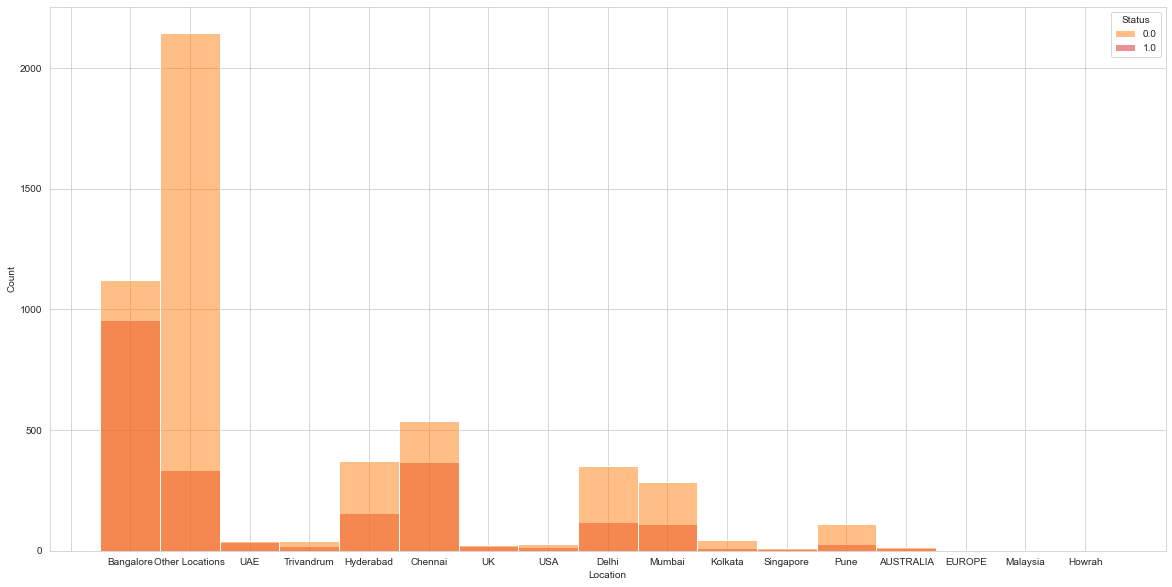

In [313]:
plt.figure(figsize=(20,10))
sns.histplot(x=data.Location,data=data,hue=df.Status,palette=['tab:orange', 'tab:red'])
plt.show()


In [321]:
# insights: there is maximum high potential Status in Bangalore.

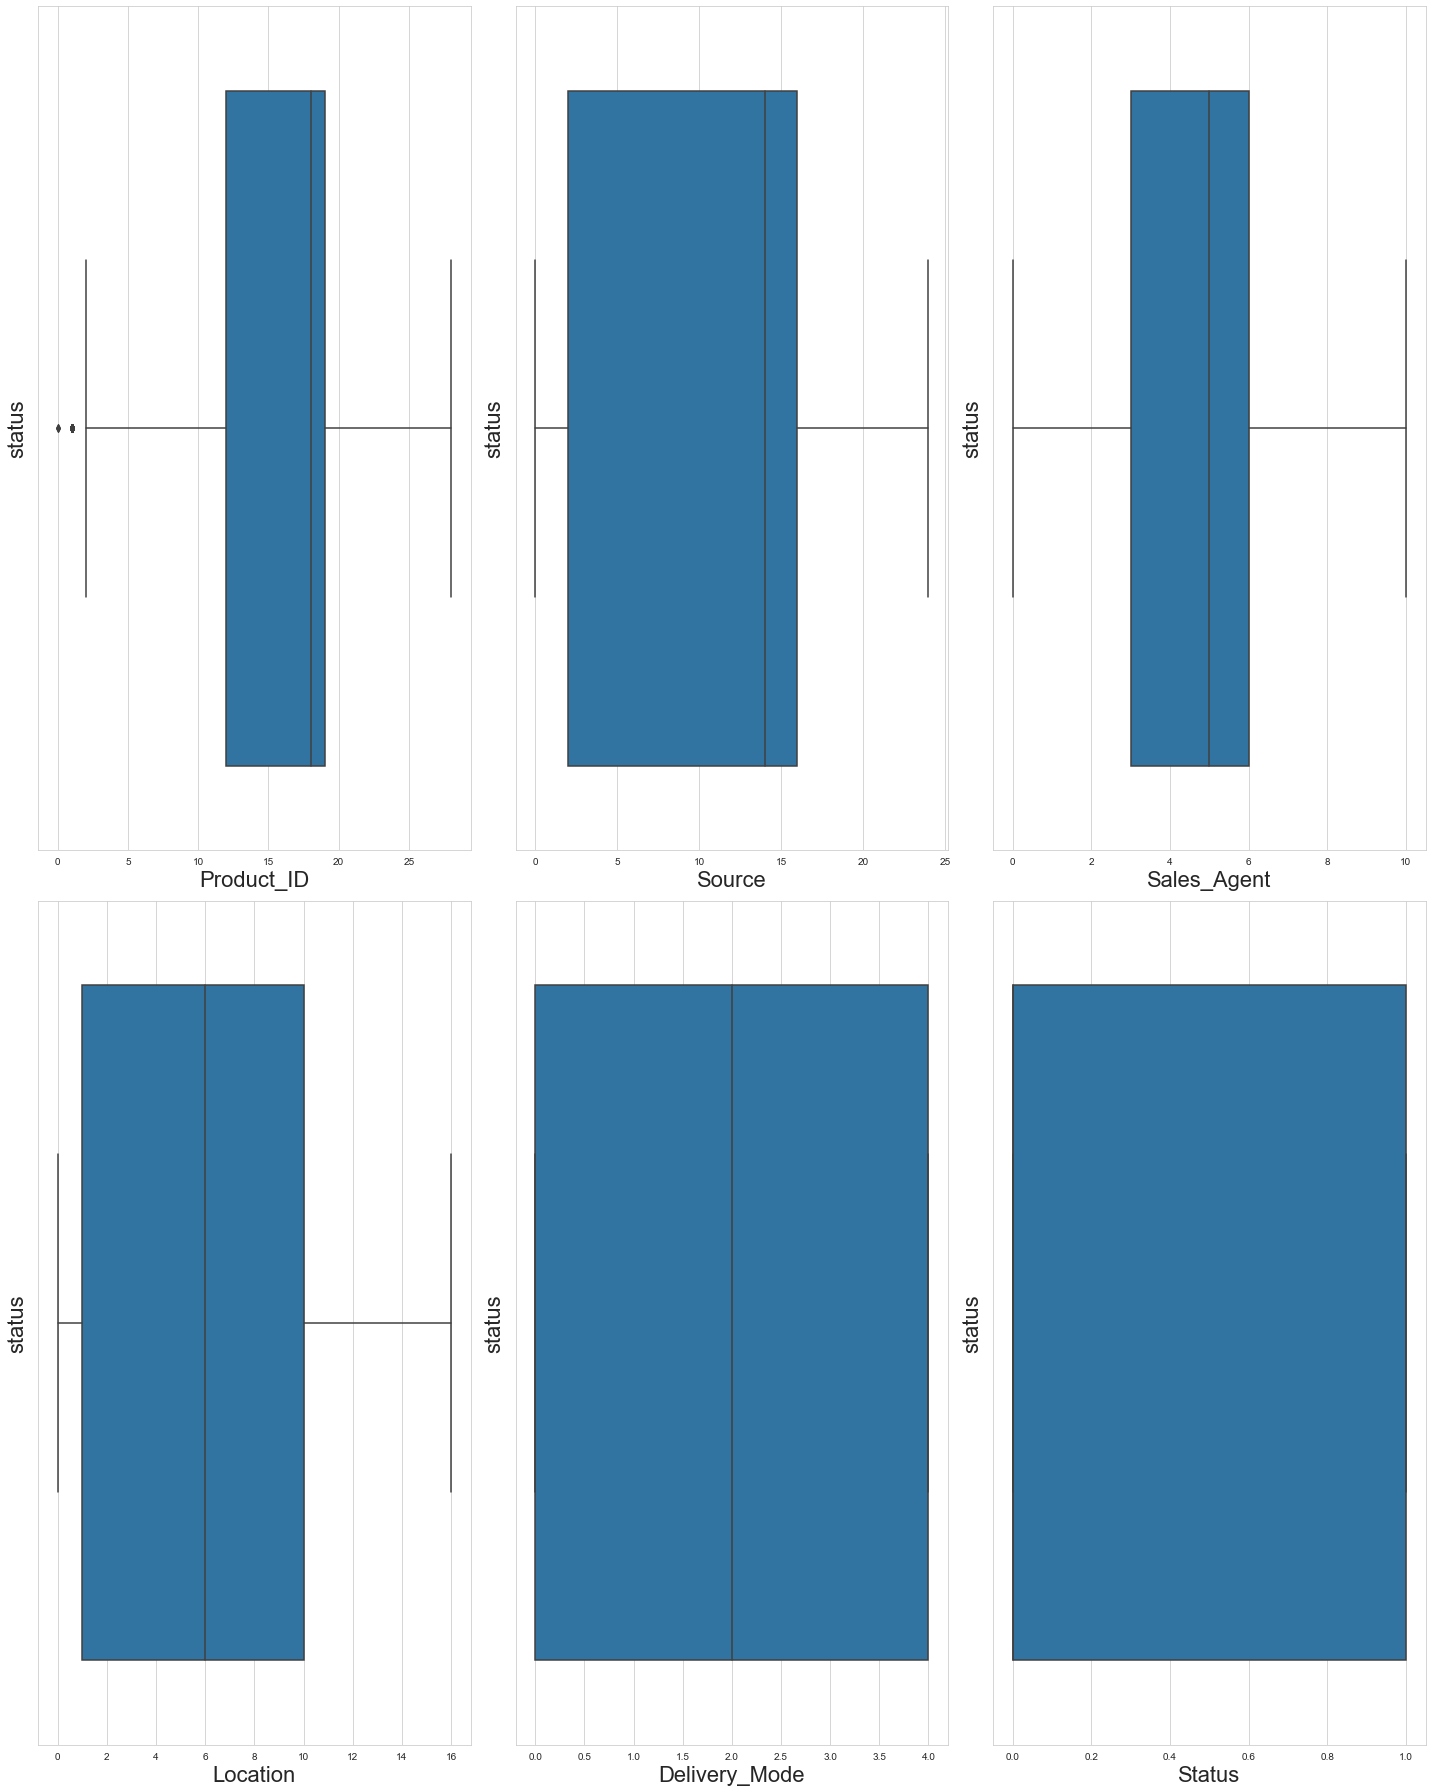

In [293]:
plt.figure(figsize=(20,25), facecolor='white') 
plotnumber = 1a

for column in df:
    if plotnumber<=6 :
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=22)
        plt.ylabel('status',fontsize=22)
    plotnumber+=1
plt.tight_layout()

In [319]:
# insights: Data is almost clear with no outliers except very few in product_ID

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

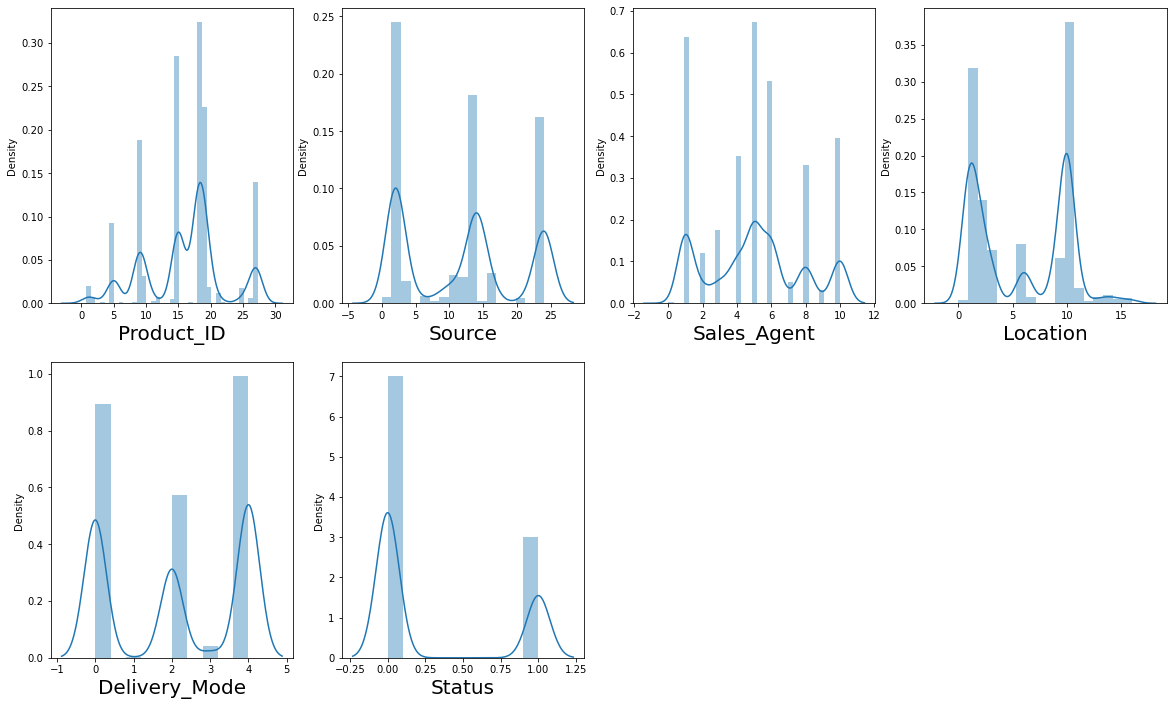

In [234]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')#defining  canvas size
plotnumber = 1 #maintian count for graph

for column in df:
    if plotnumber<=16 :# as there are 9 columns in the data
        ax = plt.subplot(4,4,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count 
        sns.distplot(df[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [ ]:
Insights: Data is mostly normally distributed.

<AxesSubplot:>

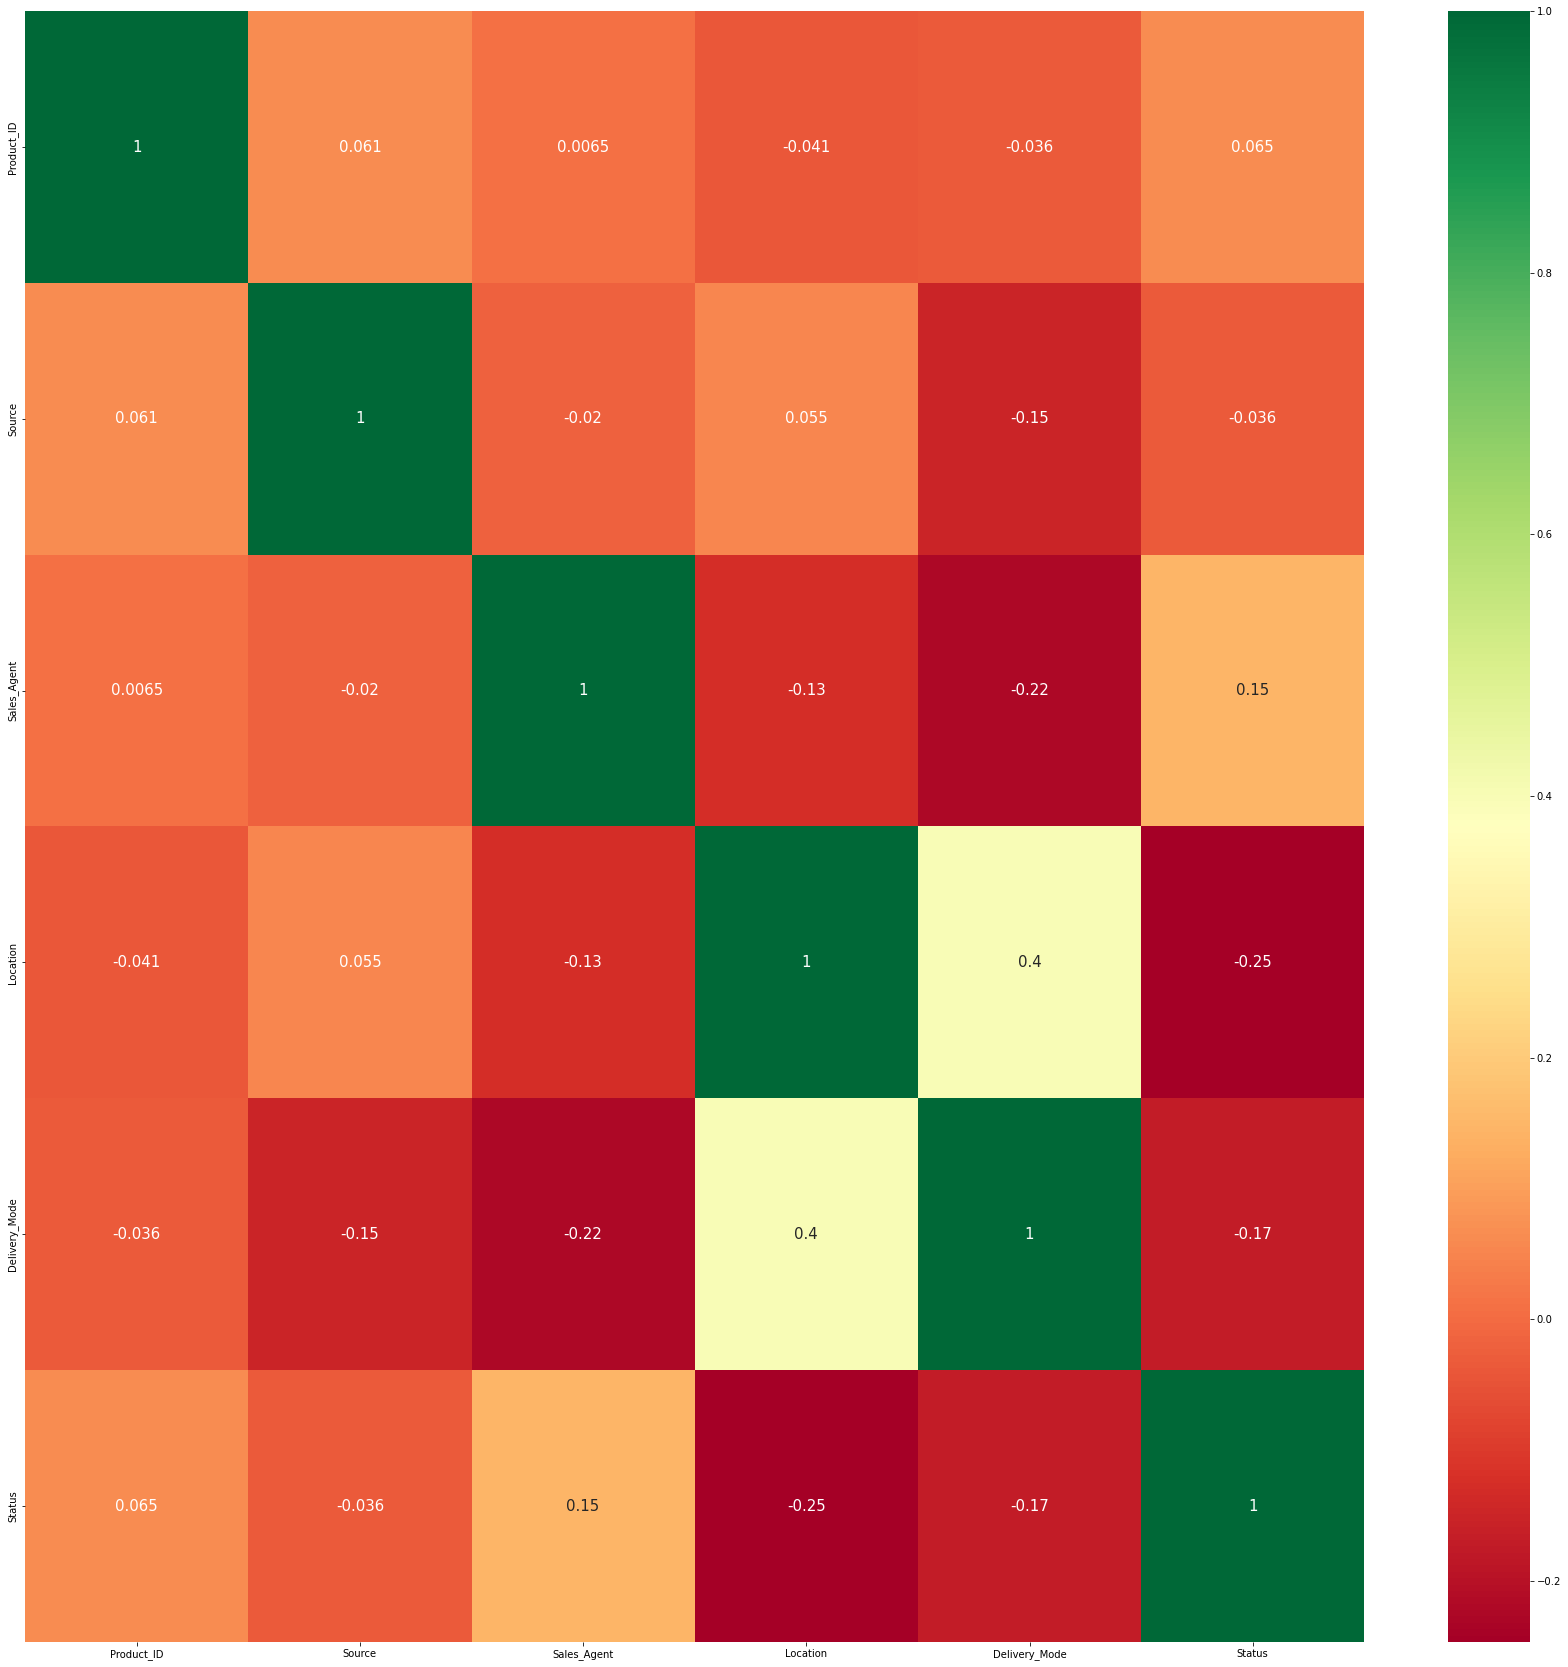

In [226]:
plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [315]:
# insights: status is not highly correlated with any variable.

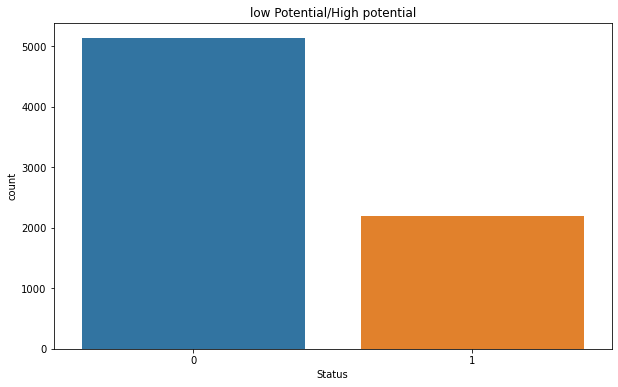

In [240]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Status')
plt.title('low Potential/High potential')
plt.show()


In [246]:
# insights: low potential Status has more values than high potential in the dataset.

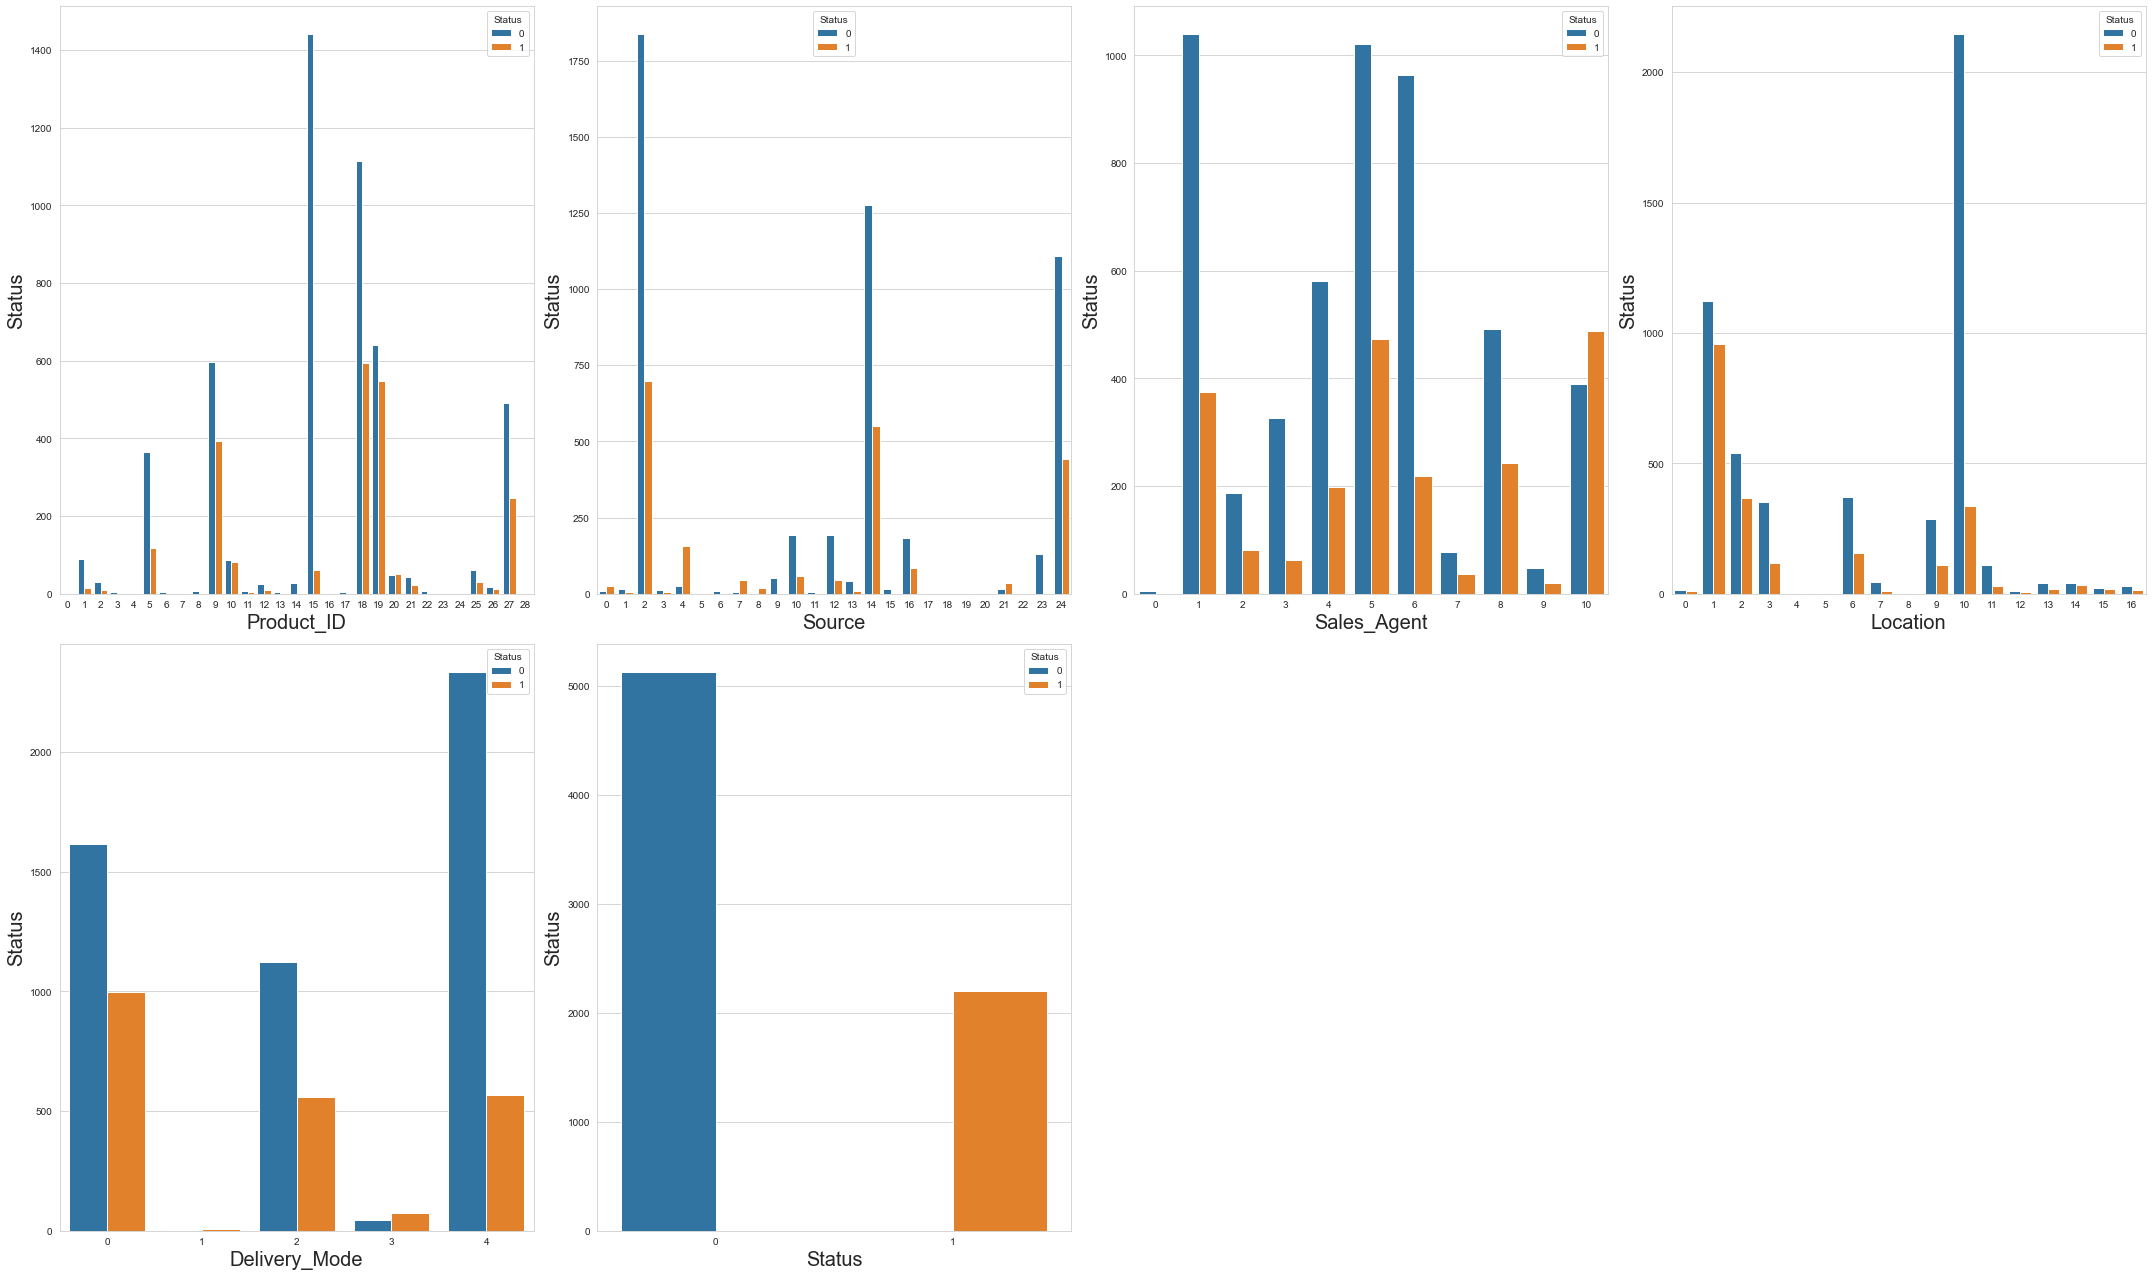

In [296]:
plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=df[column]
                        ,hue='Status',data=df)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Status',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# insights:
# Product_ID 18 and 19 has maximum number of High potential status.
# Product_ID 15has maximum number of low potential status.
# Sales_Agent 5 and 10 has maximumnumber of high potential status.
# Delivery_Mode 4 has maximum number of low potential status.
# Delivery_mode 0 has maximum number of high potential status.

In [195]:
df.Status=df['Status'].astype('int64')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7328 entries, 18 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int64
 1   Source         7328 non-null   int32
 2   Sales_Agent    7328 non-null   int32
 3   Location       7328 non-null   int32
 4   Delivery_Mode  7328 non-null   int32
 5   Status         7328 non-null   int64
dtypes: int32(4), int64(2)
memory usage: 544.3 KB


In [197]:
df.Status.value_counts()

0    5129
1    2199
Name: Status, dtype: int64

In [198]:
X=df.iloc[:,:-1]
y=df.Status

In [199]:
X

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
18,9,16,4,1,0
19,19,2,5,10,4
24,18,24,1,13,0
25,15,24,8,6,0
26,18,2,8,1,0
...,...,...,...,...,...
7417,9,2,7,9,3
7418,15,2,2,10,4
7419,5,14,1,1,0
7420,21,1,5,10,0


In [200]:
y

18      1
19      1
24      1
25      0
26      1
       ..
7417    0
7418    0
7419    0
7420    0
7421    1
Name: Status, Length: 7328, dtype: int64

### Model Creation

In [317]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [318]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[1443   75]
 [ 573  108]]


Accuracy of Logistic Regression: 70.53206002728513 

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      1518
           1       0.59      0.16      0.25       681

    accuracy                           0.71      2199
   macro avg       0.65      0.55      0.53      2199
weighted avg       0.68      0.71      0.64      2199



m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
print(pd.crosstab(y_test, nbpred))

In [225]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=1000, random_state=42,max_depth=8)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[1425   93]
 [ 486  195]]


Accuracy of Random Forest: 73.66984993178718 

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1518
           1       0.68      0.29      0.40       681

    accuracy                           0.74      2199
   macro avg       0.71      0.61      0.62      2199
weighted avg       0.72      0.74      0.70      2199



In [217]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score= accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[1302  216]
 [ 404  277]]


Accuracy of Extreme Gradient Boost: 71.80536607548886 

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1518
           1       0.56      0.41      0.47       681

    accuracy                           0.72      2199
   macro avg       0.66      0.63      0.64      2199
weighted avg       0.70      0.72      0.70      2199



In [261]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))


confussion matrix
[[1420   98]
 [ 489  192]]


Accuracy of K-NeighborsClassifier: 73.30604820372896 

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1518
           1       0.66      0.28      0.40       681

    accuracy                           0.73      2199
   macro avg       0.70      0.61      0.61      2199
weighted avg       0.72      0.73      0.69      2199



In [219]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score= accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[1458   60]
 [ 507  174]]


Accuracy of DecisionTreeClassifier: 74.21555252387448 

              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1518
           1       0.74      0.26      0.38       681

    accuracy                           0.74      2199
   macro avg       0.74      0.61      0.61      2199
weighted avg       0.74      0.74      0.70      2199



In [260]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[1480   38]
 [ 608   73]]


Accuracy of Support Vector Classifier: 70.62301045929968 

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      1518
           1       0.66      0.11      0.18       681

    accuracy                           0.71      2199
   macro avg       0.68      0.54      0.50      2199
weighted avg       0.69      0.71      0.62      2199



In [264]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                   nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,70.532060
1,Naive Bayes,70.713961
2,Random Forest,73.669850
3,Extreme Gradient Boost,71.805366
4,K-Nearest Neighbour,73.306048
5,Decision Tree,74.215553
6,Support Vector Machine,70.623010


In [266]:
#insights:Decision Tree machine Algorithim is giving best accuracy among other models i.e 74.21%

### CONCLUSION:
* 80% source data is from call,live chart direct and website.
* Low potential status has more values than high potential status in the dataset.
* Product_ID 18 and 19 has maximum number of High potential status.
* Product_ID 15has maximum number of low potential status.
* Sales_Agent 5 and 10 has maximumnumber of high potential status.
* Delivery_Mode 4 has maximum number of  low potential status.
* Delivery_mode 0 has maximum number of high potential status.
* Bangalore has maximum number of high Potential status.
* Among different Machine Learning Algorithims Decision Tree gives best accuracy of 74.2%